In [70]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Generate Random Training Data

Genering 200 data points with 2 features.100 with label -1 and 100 with label 1. The data is generated using python random library with the uniform() function. The value range for either of the labels may be modified easily by changing min1, max1, min2 and max2 values. The number of data points may be changed by changing the count value. Default values have been set to 100.

In [9]:
def data_gen(min1, max1, min2, max2, label, count):
    X = []
    y = []
    for i in range(count):
        X.append([random.uniform(min1,max1),
                     random.uniform(min2,max2)])
        y.append(label)
    return X,y

Features shape (200, 2)
Labels shape (200,)


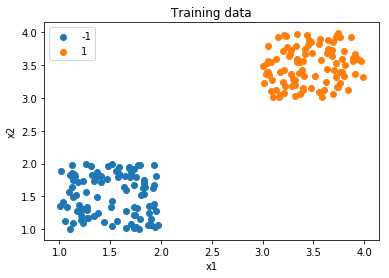

In [63]:
X, y = data_gen(min1 = 1 ,max1 = 2,
                  min2 = 1,max2 = 2,
                  label = -1,count = 100)
X2, y2 = data_gen(min1 = 3, max1 = 4,
                 min2 = 3, max2 = 4,
                 label=1, count = 100)
X = np.array(X)
X2 = np.array(X2)
X = np.concatenate((X,X2),axis=0)
y2 = np.array(y2)
y = np.array(y)
y = np.append(y,y2)
print("Features shape", X.shape)
print("Labels shape", y.shape)

plt.scatter(X[:100,0],X[:100,1],label='-1')
plt.scatter(X[100:200,0],X[100:200,1],label='1')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc='upper left')
plt.title("Training data")
plt.show()

# Generate Random Test Data

The test data has been made with the two clusters having more variance to find out how well the Perceptron model has fitted the line between the two clusters. The test data size is set to 100.

Features shape (100, 2)
Labels shape (100,)


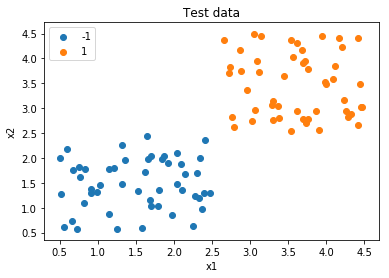

In [65]:
X_test, y_test = data_gen(min1 = 0.5 ,max1 = 2.5,
                  min2 = 0.5,max2 = 2.5,
                  label = -1,count = 50)
X2_test, y2_test = data_gen(min1 = 2.5, max1 = 4.5,
                 min2 = 2.5, max2 = 4.5,
                 label=1, count = 50)
X_test = np.array(X_test)
X2_test = np.array(X2_test)
X_test = np.concatenate((X_test,X2_test),axis=0)
y2_test = np.array(y2_test)
y_test = np.array(y_test)
y_test = np.append(y_test,y2_test)
print("Features shape", X_test.shape)
print("Labels shape", y_test.shape)

plt.scatter(X_test[:50,0],X_test[:50,1],label='-1')
plt.scatter(X_test[50:100,0],X_test[50:100,1],label='1')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc='upper left')
plt.title("Test data")
plt.show()

# Perceptron
The perceptron model is based on the Perceptron code in Python Machine Learning by Sebastian Raschka. Variable eta sets the learning rate and n_iter sets the number of iterations to be done for learning.

In [59]:

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(X.shape[1] + 1)
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

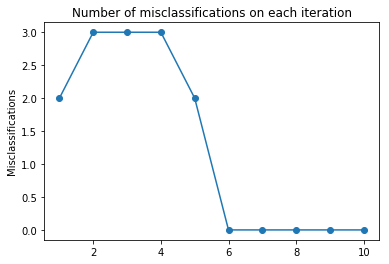

In [67]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.ylabel('Misclassifications')
plt.title("Number of misclassifications on each iteration")
plt.show()

In [71]:
prediction = ppn.predict(X_test)
correct = accuracy_score(y_test, prediction)
print("Correct predictions", correct)

Correct predictions 0.91
